![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [13]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [9]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print(bikes.groupby('workingday').total.describe().T)
print(bikes.total.describe().T)

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64
workingday            0            1
count       3474.000000  7412.000000
mean         188.506621   193.011873
std          173.724015   184.513659
min            1.000000     1.000000
25%           44.000000    41.000000
50%          128.000000   151.000000
75%          304.000000   277.000000
max          783.000000   977.000000
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64


# análisis descriptivo

Los promedios de rentas de bike, desviación estandar y percentiles son similares, lo que permite asegurar que la renta de bikes es el un poco más del doble de un dia laboral los fines de semana o feriados.



In [46]:
# Celda 1.2
print(bikes.groupby('hour').total.mean() )
print(bikes.groupby('hour').total.describe().T)

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
hour           0           1           2           3           4           5   \
count  455.000000  454.000000  448.000000  433.000000  442.000000  452.000000   
mean    55.138462   33.859031   22.899554   11.757506    6.407240   19.767699   
std     43.620012   34.112105   26.110267   12.666442    4.217633   12.784293   
min      2.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     24.000000   11.000000    5.000000    3.000000    3.000000    8.000000   
50%     41.000000   19.000000   11.000000    6.000000    6.000000   19.00

# análisis descriptivo
se puede determinar que existen dos picos o conetentraciones en alquiler de bikes, uno en la franja de la mañana a las 8 am con 362 rentas; y otro en la frnaja de la tarde a las 5pm con 468 renatas promedio. De la misma forma se presenta una renta valle desde las 11pm hasta las 6am.  

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

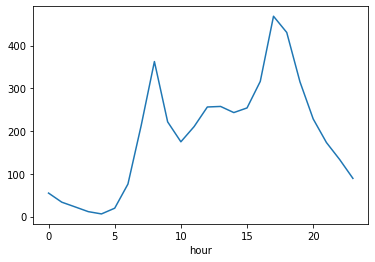

In [47]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

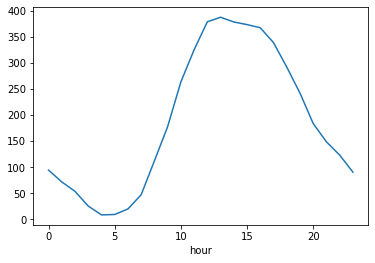

In [48]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot()

# Análisis dia No laboral

* Se presenta un pico sostenido a partir de las 12 del dia y hasta las 4pm, entendiendo que son las horas donde las personas rentan las bikes, para descanzo  o aprovechamiento de las horas del dia.
* Adicional evidencia que el aumento inicia a las 7am creciendo constante hasta el medio dia, y luego decrece constantemente hasta las 3am, este decrecimiento se da más lento que la presentada en la franja de la mañana.


<AxesSubplot:xlabel='hour'>

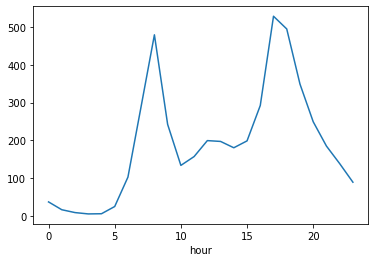

In [49]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday == 1].groupby('hour').total.mean().plot()

# Análisis dia laboral

* Se presetan dos picos uno en la mañana sobre las 8am y otro en la tarde a las 5pm, relacionadas a ingresos y salidas de lugares de trabajo
* Se presenta unas horas valles que pueden estar relacionadas a personas que no usan bikes para llegar a sus trabajos, pero que la usan para desplazamientos cortos a desayunar, o almorzar. 

* Los picos son más altos los dias laborales y de poca duración, comparados con los de los dias No laborales
 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [131]:
# Celda 3
from sklearn.model_selection import train_test_split

features = ['workingday', 'hour']
X_total_lr = bikes[features]
#y_total_lr = (bikes.total > 145).astype(int)
y_total_lr = bikes.total

reg = LinearRegression()
reg.fit(X_total_lr,y_total_lr)
rmse_scores=np.sqrt(-cross_val_score(reg, X_total_lr, y_total_lr, cv=10, scoring='neg_mean_squared_error'))
print(f'Score Media RMSE:{rmse_scores.mean()}')
print(f'Score Standart Deviation RMSE:{rmse_scores.std()}')
print(f'Score Media R2 - Coefficient of determination:{reg.score(X_total_lr,y_total_lr)}')
print(f'Coeficientes {reg.coef_}')
print(f'Intercepto {reg.intercept_}')

Score Media RMSE:165.22328668912974
Score Standart Deviation RMSE:39.42354316690923
Score Media R2 - Coefficient of determination:0.16059115011434866
Coeficientes [ 4.07248627 10.49206282]
Intercepto 67.70595026191619


In [132]:
from sklearn  import metrics

XTrain, XTest, yTrain, yTest = train_test_split(X_total_lr, y_total_lr, test_size=0.33, random_state=0)

reg2 = LinearRegression()
reg2.fit(XTrain,yTrain)

y_pred = reg2.predict(XTest)
# The coefficients
print("Coefficients: \n", reg2.coef_)


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yTest, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))


Coefficients: 
 [ 6.770441   10.55099422]
Coefficient of determination: 0.15
Mean Absolute Error: 125.05180604474933
Mean Squared Error: 27657.435595059636
Root Mean Squared Error: 166.3052482486937


# Análisis regresion lineal

* El coeficiente de determinacion es muy pobre 15%, la cual no permite la explicacion de la variacion de rentas de bikes.
* Los coeficientes nos indican que si es un dia laboral, este incrementa en 6.7 unidades de renta de bikes, y por cada hora que aumenta, la renta se incrementa en 10.5, la cual no es nada parecido a la realidad.
* La metrica de desempeno usada fue RMSE y con un valor de 166.3


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64
                     workingday  hour
datetime                             
2011-01-01 00:00:00           0     0
2011-01-01 01:00:00           0     1
2011-01-01 02:00:00           0     2
2011-01-01 03:00:00           0     3
2011-01-01 04:00:00           0     4
...                         ...   ...
2012-12-19 19:00:00           1    19
2012-12-19 20:00:00           1    20
2012-12-19 21:00:00           1    21
2012-12-19 22:00:00           1    22
2012-12-19 23:00:00           1    23

[10886 rows x 2 columns]
datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    1

<AxesSubplot:xlabel='workingday', ylabel='hour'>

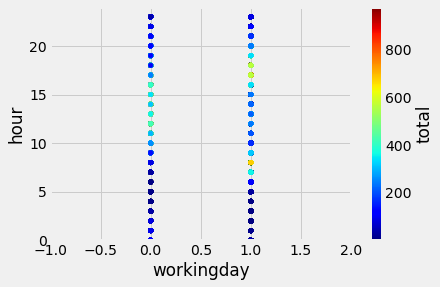

In [133]:
# Celda 4
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

print(bikes.total.describe())

# Separación de variables predictoras (X) y variable de interes (y)
X = bikes[features]
#y = (bikes.total > 145).astype(int)
y = bikes.total

print(X)
print(y)

%matplotlib inline

features2 = ['workingday', 'hour', 'total']

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
bikes[features2].plot(kind='scatter', x='workingday', y='hour', c='total', colormap='jet', xlim=(-1, 2), ylim=(0, 24))


In [134]:
# Impresión variable a usar (Hits)
j = 1
print(X.columns[j])

hour


In [135]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [136]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]


In [137]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

-27775.88300816515

In [138]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-138889.2339678902

In [139]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'hour' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

10610.413579790038

In [140]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(1, 8.0, 18268.811823533004)

In [141]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [142]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [143]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [144]:
tree = tree_grow(X, y, level=6, min_gain=0.001, max_depth=10, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 6,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 7,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 8,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 9,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 10,
     'split': -1,
     'n_samples': 909,
     'gain': 1402.5704281636313},
    'sr': {'y_pred': 1,
     'y_prob': 15.260551491277434,
     'level': 10,
     'split': -1,
     'n_samples': 1775,
     'gain': 77.36245117563396}},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 9,
    'split': [0, 1.0],
    'n_samples': 455,
    'gain': 2961.6385

In [145]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [146]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

MIN MSE 114.64345547520414 fue obtenido con un arbol de Profundidad=10
Score Media RMSE:107.57576561312104
Score Standart Deviation RMSE:39.63050007312498
            Importancia
workingday      0.18495
hour            0.81505


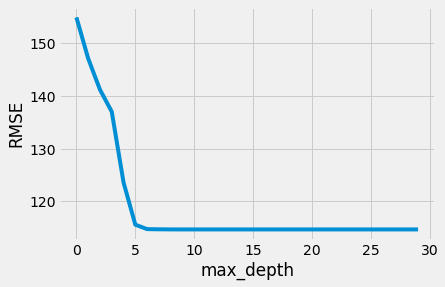

In [147]:
# Celda 5
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeRegressor
import math
rmse_scores=[]

X = bikes[features]
y = bikes.total
#y = (bikes.total > 145).astype(int)

for depth in range(30):
  reg= DecisionTreeRegressor(max_depth=depth+1,random_state=101)
  mse=-cross_val_score(reg, X,y, cv=10, scoring='neg_mean_squared_error').mean()
  rmse_scores.append(np.sqrt(mse))
index_min= np.argmin(rmse_scores)
min_rmse= np.min(rmse_scores)
print(f'MIN MSE {min_rmse} fue obtenido con un arbol de Profundidad={index_min+1}')

# Obteniendo la evaluacion del desempeno de este arbol final con 10 niveles de profundida
reg= DecisionTreeRegressor(max_depth=index_min+1,random_state=101)
reg.fit(X,y)
mse=-cross_val_score(reg, X, y, cv=10,scoring='neg_mean_squared_error')
rmse= np.sqrt(mse)

print(f'Score Media RMSE:{rmse.mean()}')
print(f'Score Standart Deviation RMSE:{rmse.std()}')
df =pd.DataFrame(index=X.columns,data= reg.feature_importances_, columns=["Importancia"]).sort_values("Importancia")
print(df)

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(range(30), rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

# Análisis

El resultado obtenido por arboles de decision es de 107.57 mientras que con regresin lineal era de 166, mejorando el desempeño del modelo.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [107]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [108]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [109]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9